In [19]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

# 모델의 정확도를 기록하면서 동시에 저장하는 것을 도와주는 라이브러리
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os

In [20]:
np.random.seed(3)
tf.random.set_seed(3)

# 칼럼이 0, 1, 2, 3, 4, 5 ... 57, 58, 59, 60
df_pre = pd.read_csv('deeplearning/dataset/wine.csv', header=None)
df_pre.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [21]:
# sample() : 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수
# frac = 1 => 원본 데이터의 100%를 불러오는 것
# frac이 0.5라면 원본 데이터 중 50%만 랜덤으로 가져온다.

df = df_pre.sample(frac=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.0,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.4,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.8,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.5,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,9.0,0.400,0.43,2.4,0.068,29.0,46.0,0.99430,3.20,0.60,12.20,6,1
1667,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.70,8,0
3321,7.5,0.400,1.00,19.5,0.041,33.0,148.0,0.99770,3.24,0.38,12.00,6,0
1688,7.1,0.440,0.62,11.8,0.044,52.0,152.0,0.99750,3.12,0.46,8.70,6,0


In [22]:
dataset = df.values
dataset

array([[ 5.9  ,  0.18 ,  0.28 , ..., 10.65 ,  7.   ,  0.   ],
       [10.2  ,  0.67 ,  0.39 , ..., 10.   ,  5.   ,  1.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  9.4  ,  5.   ,  1.   ],
       ...,
       [ 7.5  ,  0.4  ,  1.   , ..., 12.   ,  6.   ,  0.   ],
       [ 7.1  ,  0.44 ,  0.62 , ...,  8.7  ,  6.   ,  0.   ],
       [ 6.6  ,  0.24 ,  0.22 , ...,  9.4  ,  5.   ,  0.   ]])

In [23]:
x = dataset[:, :12]
y = dataset[:, 12]

In [24]:
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics = ['accuracy']
             )

In [25]:
MODEL_DIR = 'models/wine/'

# 해당 경로에 폴더가 있는지 확인하고 없아면 폴더를 만든다.
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = 'models/wine/{epoch:02d}-{val_loss:.4f}.hdf5'

In [26]:
# 학습 정확도는 acc, 테스트셋 정확도는 val_acc, 학습셋 오차는 loss로 기록되고,
# 테스트 오차는 val_loss 라는 이름으로 기록된다.
# save_best_only=True : 모델이 앞서 저장한 모델보다 나아졌을 때만 저장하는 옵션
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=True, save_best_only=True)

# patience 속성은 n회의 epoch동안 성능이 향상되지 않는다면 종료
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [ ]:
#20%의 데이터만 테스트셋으로 사용하고 나머지는 학습셋으로 사용 
history = model.fit(x, y, epochs=10, validation_split=0.2, batch_size=1, 
                    verbose = False, callbacks=[early_stopping_callback, checkpointer])

In [27]:
print('Accuracy : %.4f' % model.evaluate(x, y)[1])

204/204 [==============================] - 1s 5ms/step - loss: 1.8256 - accuracy: 0.7539
Accuracy : 0.7539


In [36]:
data = model.predict(x)
preidct = []


for i in range(len(data)):
    preidct = preidct + [data[i][0]]
    #preidct = preidct + [1 if data[i][0] >= 0.5 else 0]

print(preidct[:10]) # 예측
print(list(y[:10].astype(int))) # 실제 결과

[3.2106707e-06, 0.019732833, 0.0012161136, 8.160784e-08, 0.004237473, 9.775006e-08, 1.0680961e-06, 9.314759e-05, 5.3531903e-07, 7.981929e-09]
[0, 1, 1, 0, 1, 0, 1, 1, 0, 0]


In [29]:
##### 그래프로 표현하기 #####

In [30]:
history.history

{'loss': [0.24710413813591003,
  0.17932765185832977,
  0.14478132128715515,
  0.11828992515802383,
  0.10584989935159683,
  0.1010434478521347,
  0.09722018986940384,
  0.0893479734659195,
  0.08451586961746216,
  0.0850638821721077],
 'accuracy': [0.9145660996437073,
  0.9366942644119263,
  0.9492014646530151,
  0.9613238573074341,
  0.9636328816413879,
  0.9661343097686768,
  0.9690206050872803,
  0.9715220332145691,
  0.9749855399131775,
  0.9711371660232544],
 'val_loss': [0.17529840767383575,
  0.18854138255119324,
  0.10892749577760696,
  0.1247614324092865,
  0.11058460175991058,
  0.07269487529993057,
  0.061138879507780075,
  0.16678637266159058,
  0.08936639130115509,
  0.06684534251689911],
 'val_accuracy': [0.942307710647583,
  0.9430769085884094,
  0.9592307806015015,
  0.9561538696289062,
  0.9592307806015015,
  0.9738461375236511,
  0.9776923060417175,
  0.9453846216201782,
  0.9738461375236511,
  0.9776923060417175]}

In [31]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

x_len

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

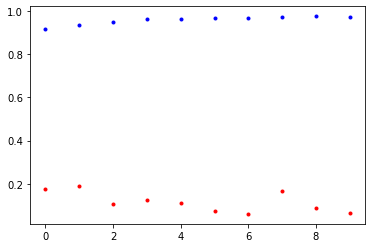

In [32]:
# 테스트 오차와 정확도에 대한 그래프

plt.plot(x_len, y_vloss, 'o', c='red', markersize='3')
plt.plot(x_len, y_acc, 'o', c='blue', markersize='3')

plt.show()

In [33]:
##### 파일로 만들기 #####

In [34]:
print(y_vloss)
print('=' * 50)
print(y_acc)

[0.17529840767383575, 0.18854138255119324, 0.10892749577760696, 0.1247614324092865, 0.11058460175991058, 0.07269487529993057, 0.061138879507780075, 0.16678637266159058, 0.08936639130115509, 0.06684534251689911]
[0.9145660996437073, 0.9366942644119263, 0.9492014646530151, 0.9613238573074341, 0.9636328816413879, 0.9661343097686768, 0.9690206050872803, 0.9715220332145691, 0.9749855399131775, 0.9711371660232544]


In [37]:
f = open("files/result_wine.txt", 'w')

for i in range(1, len(y_vloss)):
    data = '테스트셋 오차 : %.3f\t정확도 : %.3f\n' % (y_vloss[i], y_acc[i])
    f.write(data)
f.close()